In [ ]:
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as k

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving kidney_disease.csv to kidney_disease (1).csv


In [ ]:
df=pd.read_csv('kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.shape

(400, 26)

In [ ]:
columns_2_retain=['sg','al','sc','hemo','pcv','wc','rbc','htn','classification']

#Drop the columns that are not in columns_2_retain
df=df.drop([col for col in df.columns if not col in columns_2_retain], axis=1)

#Drop the rows with Nan or missing values
df=df.dropna(axis=0)

In [ ]:
#Transform the non numeric data in the columns
for column in df.columns:
  if df[column].dtype==np.number:
    continue
  else:
    df[column]=LabelEncoder().fit_transform(df[column])

In [ ]:
#Print the first five rows new cleaned dataset
df.head()

,sg,al,rbc,sc,hemo,pcv,wc,htn,classification
2,1.010,2.0,1,1.8,9.6,13,61,0,0
3,1.005,4.0,1,3.8,11.2,14,53,1,0
4,1.010,2.0,1,1.4,11.6,17,59,0,0
7,1.015,2.0,1,1.1,12.4,25,55,0,0
8,1.015,3.0,1,1.9,10.8,15,78,1,0


In [ ]:
#Split the  data into independent (X) dataset and independent (y) dataset
X=df.drop(['classification'], axis=1)
y=df['classification']


In [ ]:
#Feature scaling
x_scaler=MinMaxScaler()
x_scaler.fit(X)
column_names=X.columns
X[column_names]=x_scaler.transform(X)

In [ ]:
#split the data into 4:1
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, shuffle=True)

In [ ]:
#Build the model
model=Sequential()
model.add(Dense(256, input_dim=len(X.columns), kernel_initializer=k.initializers.random_normal(seed=13), activation='relu'))
model.add(Dense(1, activation='hard_sigmoid'))

In [ ]:
#Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Train the model
history=model.fit(X_train, y_train,epochs=2000, batch_size=X_train.shape[0])

Epoch 1/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.2821
Epoch 2/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6791 - accuracy: 0.8910
Epoch 3/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6664 - accuracy: 0.8910
Epoch 4/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6540 - accuracy: 0.8846
Epoch 5/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6421 - accuracy: 0.8782
Epoch 6/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6304 - accuracy: 0.8782
Epoch 7/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6191 - accuracy: 0.8590
Epoch 8/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6081 - accuracy: 0.8590
Epoch 9/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5974 - accuracy: 0.8462
Epoch 10/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5870 - accuracy: 0.8333
Epoch 11/2000
1/1 [

In [ ]:
#Save the model
model.save('ckd.model')


INFO:tensorflow:Assets written to: ckd.model/assets


Text(0.5, 0, 'epoch')

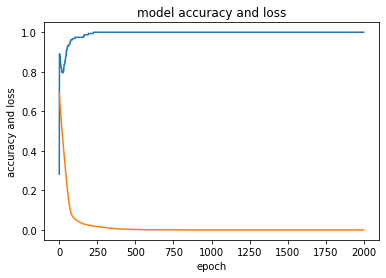

In [ ]:
#Visualize the loss and accuracy of the model
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy and loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')

In [ ]:
print('shape of train data:', X_train.shape)
print('shape of test data:', X_test.shape)

shape of train data: (156, 8)
shape of test data: (39, 8)


In [ ]:
pred=model.predict(X_test)

In [ ]:
#Show the actual values
print(y_test)
print(pred)

375    1
107    0
212    0
318    1
351    1
310    1
190    0
22     0
84     0
173    0
281    1
284    1
226    0
20     0
368    1
293    1
307    1
269    1
341    1
329    1
367    1
127    0
267    1
392    1
348    1
234    0
386    1
378    1
3      0
249    0
395    1
298    1
262    1
246    0
128    0
272    1
11     0
4      0
265    1
Name: classification, dtype: int64
[1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1]


In [ ]:
print('Original {0}:'.format(", ".join(str(x) for x in y_test)))
print('Predict  {0}:'.format(", ".join(str(x) for x in pred)))

Original 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1:
Predict  1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1:
